In [1]:
#RERUN THIS IF YOUR CONNECTION GETS RESET

#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import os as os

#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

#load some libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

#take the exponential
import math

#import regression libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

### Choice Models and Conjoint Analysis

### Logistic Regression and Choice Models

In [3]:
#Python dataset
sydney = pd.read_csv('sydney.csv');

In [4]:
len(sydney)#number of records
sydney.info()#fields
sydney.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cartime    333 non-null    int64 
 1   carcost    333 non-null    int64 
 2   traintime  333 non-null    int64 
 3   traincost  333 non-null    int64 
 4   choice     333 non-null    object
dtypes: int64(4), object(1)
memory usage: 13.1+ KB


,cartime,carcost,traintime,traincost,choice
0,70,50,64,39,TRAIN
1,50,230,60,32,TRAIN
2,50,70,58,40,CAR
3,60,108,93,62,CAR
4,70,60,68,26,TRAIN


In [5]:
sydney.describe()

,cartime,carcost,traintime,traincost
count,333.000000,333.000000,333.000000,333.000000
mean,45.465465,57.753754,66.321321,38.219219
std,18.308670,33.551875,19.296561,14.497507
min,10.000000,8.000000,3.000000,7.000000
25%,30.000000,32.000000,56.000000,28.000000
50%,45.000000,50.000000,67.000000,36.000000
75%,60.000000,70.000000,76.000000,46.000000
max,95.000000,230.000000,145.000000,97.000000


In [6]:
#create dummy variable
sydney = pd.get_dummies(sydney, columns=['choice'])

In [8]:
sydney.head(10)

,cartime,carcost,traintime,traincost,choice_CAR,choice_TRAIN
0,70,50,64,39,0,1
1,50,230,60,32,0,1
2,50,70,58,40,1,0
3,60,108,93,62,1,0
4,70,60,68,26,0,1
5,20,32,72,65,1,0
6,40,30,60,37,0,1
7,15,8,22,20,1,0
8,60,60,83,31,0,1
9,29,20,40,17,1,0


In [9]:
train_model = LogisticRegression(solver='liblinear', random_state=0)

In [10]:
import statsmodels.api as sm
#we neeed to specify that we want to include an intercept
sydney['intercept']=1.0 

# identify the independent variables 
train_ind_cols=['cartime','carcost','traintime','traincost','intercept']

train_logit = sm.Logit(sydney['choice_TRAIN'],sydney[train_ind_cols])

train_result=train_logit.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [11]:
print(train_result.summary())

                           Logit Regression Results                           
Dep. Variable:           choice_TRAIN   No. Observations:                  333
Model:                          Logit   Df Residuals:                      328
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Jan 2022   Pseudo R-squ.:                     inf
Time:                        19:00:14   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cartime        0.0565      0.011      5.179      0.000       0.035       0.078
carcost        0.0298      0.007      4.283      0.000       0.016       0.043
traintime      0.0149      0.009      1.573      0.1

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [12]:
#alternative approach to run a logistic regression
y = sydney['choice_TRAIN']
cartime = sydney['cartime']
carcost = sydney['carcost']
traintime = sydney['traintime']
traincost = sydney['traincost']

# define design matrix for the linear predictor
Intercept = np.array([1] * len(y))
x = np.array([Intercept, cartime, carcost, traintime, traincost]).T

# generalized linear model for logistic regression (notice we are using GLM here)
logistic_regression = sm.GLM(y, x, family=sm.families.Binomial())
sydney_fit = logistic_regression.fit()
print(sydney_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           choice_TRAIN   No. Observations:                  333
Model:                            GLM   Df Residuals:                      328
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.32
Date:                Thu, 20 Jan 2022   Deviance:                       272.63
Time:                        19:00:52   Pearson chi2:                     326.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4440      0.585     -2.468      0.0

In [13]:
print("Exp of Coefficeients")
print("traincost")
print(math.exp(train_result.params['traincost']))

Exp of Coefficeients
traincost
0.8946763754633165


In [14]:
#prediction
sydney['predicted_prob'] = train_result.predict()
#predicted class
sydney['predictions_nominal'] = [ 0 if x < 0.5 else 1 for x in sydney['predicted_prob']]

In [15]:
sum(sydney['predictions_nominal'])

148

In [16]:
#confusion matrix
print(confusion_matrix(sydney["choice_TRAIN"],sydney['predictions_nominal']))

[[155  28]
 [ 30 120]]


In [21]:
120/150

0.8

In [17]:
pd.crosstab(sydney['choice_TRAIN'],sydney['predictions_nominal'])

predictions_nominal,0,1
choice_TRAIN,,
0,155,28
1,30,120


Text(0, 0.5, 'Probabilty of Using Train')

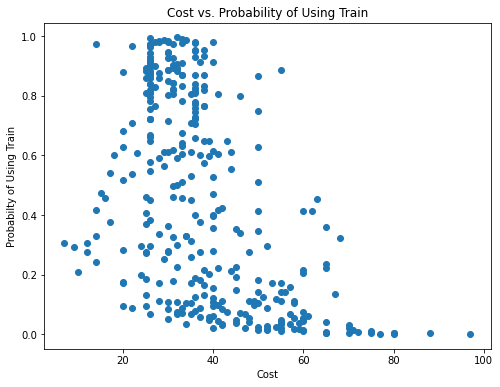

In [18]:
#create plot
plt.figure(figsize=(8, 6))
plt.scatter(sydney['traincost'], 
            sydney['predicted_prob'])
plt.title("Cost vs. Probability of Using Train")
plt.xlabel("Cost")
plt.ylabel("Probabilty of Using Train")

In [ ]:
#export logistic regression output
with open('sydney_logistic_regresion_summary.csv', 'w') as fh:
    fh.write(sydney_fit.summary().as_csv())

from google.colab import files
files.download('sydney_logistic_regresion_summary.csv')